In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [7]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [12]:
x = df.iloc[:, 1:8] 
y = df.iloc[:, 8]     

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [53]:
#SVR
from sklearn import svm
clf = svm.SVR(gamma='auto')
clf.fit(x_train, y_train)
label=[]
accuracy=[]
label.append('SVR')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.5338979311288877


In [54]:
from sklearn import linear_model
clf = linear_model.Ridge(alpha=.5)
clf.fit(x_train, y_train)
label.append('Ridge')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.8055748450870908


In [55]:
clf = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3)
clf.fit(x_train, y_train)
label.append('RidgeCV')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.8053441498198948


In [56]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train, y_train)
label.append('Lasso')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.6631338527772115


In [57]:
clf = linear_model.BayesianRidge()
clf.fit(x_train, y_train)
label.append('BayesianRidge')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.8048537518665995


In [58]:
clf = linear_model.ARDRegression()
clf.fit(x_train, y_train)
label.append('ARDRegression')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.797977463614865


In [59]:
clf = linear_model.TheilSenRegressor()
clf.fit(x_train, y_train)
label.append('TheilSenRegressor')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.809955565254049


In [60]:
clf.predict(x_test[10:20])

array([0.96106747, 0.83962482, 0.86174044, 0.79001226, 0.83443447,
       0.50854748, 0.91886187, 0.59763086, 0.78034246, 0.86645918])

In [61]:
y_test[15:25]

345    0.49
107    0.91
77     0.64
177    0.82
298    0.90
293    0.64
5      0.90
287    0.89
233    0.64
222    0.76
Name: Chance of Admit , dtype: float64

In [62]:
import matplotlib.pyplot as plt
import numpy as np
index = np.arange(len(label))
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, accuracy)
    plt.xlabel('Model', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=90)
    plt.title('Accuracy of different models')
    plt.savefig("model_accuracy.png")
    plt.show()

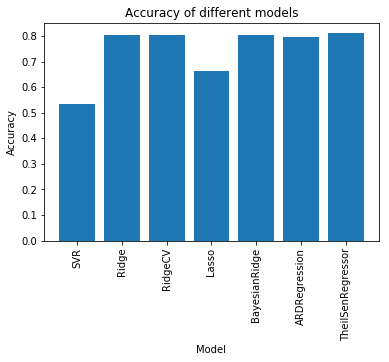

In [63]:
plot_bar_x()